# **Problema de classificação de íris simples**

Neste caso, tentaremos classificar o conjunto de dados Iris em três classes (Iris Setosa, Iris Virginica e Iris Versicolor) com base em quatro atributos: comprimento da sépala, largura da sépala, comprimento da pétala e largura da pétala.

A descrição do conjunto de dados Iris pode ser encontrada em http://archive.ics.uci.edu/ml/datasets/iris
Os dados da íris podem ser baixados de http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


# **Preparação de dados**
Primeiro, devemos importar as bibliotecas necessárias

In [ ]:
import pandas as pd #Biblioteca python  Analise de dados  
import numpy as np #Biblioteca Python Cientifica  

Usando o pandas, podemos baixar o conjunto de dados de um determinado URL e convertê-lo em um conjunto de dados.

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
new_names = ['sepal_length','sepal_width','petal_length','petal_width','iris_class']
dataset = pd.read_csv(url, names=new_names, skiprows=0, delimiter=',')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   iris_class    150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### Problema de classificação de interesse

Neste problema, existem 3 classes de interesse:

* Iris setosa
* Iris virginica
* Iris versicolor

e 4 peças de recursos:
* Comprimento da sépala
* Largura Sépala
* Comprimento da pétala
* Largura das pétalas

<table>
  <tr><td>
    <img src="https://www.tensorflow.org/images/iris_three_species.jpg"
         alt="Geometria da pétala comparada para três espécies de íris: Iris setosa, Iris virginica e Iris versicolor">
  </td></tr>
  <tr><td align="center">
    <b>Figura 1.</b> Iris setosa, Iris versicolor, e Iris virginica </td></tr>
</table>

Vamos analisar nosso conjunto de dados. Use dataset.head (n) para exibir os n dados principais. Altere dataset.head (n) para dataset.sample (n) para exibir dados aleatórios.

In [ ]:
dataset.head(10) 

,sepal_length,sepal_width,petal_length,petal_width,iris_class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
dataset.groupby('iris_class').count()

,sepal_length,sepal_width,petal_length,petal_width
iris_class,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


Agora que nosso conjunto de dados está pronto, podemos separar os recursos de entrada (x) e a classe de destino (y). O recurso de entrada será uma matriz 150x4 (150 dados x sepal_length, sepal_width, petal_length e petal_width) e a saída alvo 150x1 (iris_class).

In [ ]:
y = dataset['iris_class']
x = dataset.drop(['iris_class'], axis=1)

print ("dataset : ",dataset.shape)
print ("x : ",x.shape)
print ("y : ",y.shape)

dataset :  (150, 5)
x :  (150, 4)
y :  (150,)


Nesta sessão, usaremos um Classificador Multi-Layer Perceptron (MLP) . Precisamos codificar nosso atributo de destino para classificador baseado em Rede Neural em um formato. Podemos fazer isso chamando o método get_dummies (y) do Pandas. 

Com este método converteremos:

Iris setosa: 100

Iris versicolor: 010

Iris virginica: 001


In [ ]:
#one hot encoding
y=pd.get_dummies(y)
y.sample(7)

,Iris-setosa,Iris-versicolor,Iris-virginica
20,1,0,0
46,1,0,0
87,0,1,0
57,0,1,0
76,0,1,0
28,1,0,0
89,0,1,0


Agora que nossa entrada e destino estão prontos, podemos separar nosso conjunto de treinamento e teste usando o método scikit learn train_test_split ().

In [ ]:
#Importação seletiva Scikit Learn
from sklearn.model_selection import train_test_split

# Gerar conjuntos de treinamento e validação
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3) #0.3 dados para teste

#convertendo para float 32bit
x_train = np.array(x_train).astype(np.float32)
x_test  = np.array(x_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test  = np.array(y_test).astype(np.float32)

#imprimir dados split para validação
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(105, 4) (105, 3)
(45, 4) (45, 3)


Você pode tentar um conjunto de teste maior ou menor alterando o parâmetro test_size.

# **A parte do aprendizado de máquina MLP** 1 Parte

Para o nosso aprendizado de máquina, usaremos a implementação sklearn do Multi-Layer Perceptron (Uma arquitetura de rede neural): https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html .

Nossa rede neural será 4 x 10 x 5 x 3, portanto as camadas ocultas são (10 unidades e 5 unidades).

Defina nossa iteração máxima como 2.000 para treinar na época de 2.000 e alfa como 0,01 para definir nossa taxa de aprendizado.
Defina verbose como 1 para registrar seu processo de treinamento.
Random_state é usado como uma semente aleatória para que possamos obter a mesma saída.

In [ ]:
#Importando nosso modelo
from sklearn.neural_network import MLPClassifier

# inicialização modelo
Model = MLPClassifier(hidden_layer_sizes=(10,5), max_iter=2000, alpha=0.01, #tente mudar camadas escondidas
                     solver='sgd', verbose=1,  random_state=121) #tente verbose=0 para treinar sem log

#treinando nosso modelo
h=Model.fit(x_train,y_train)
#usando nosso modelo para prever
y_pred=Model.predict(x_test)

Iteration 1, loss = 2.41601784
Iteration 2, loss = 2.38443342
Iteration 3, loss = 2.34334799
Iteration 4, loss = 2.29650796
Iteration 5, loss = 2.24751391
Iteration 6, loss = 2.19856126
Iteration 7, loss = 2.15119599
Iteration 8, loss = 2.10619143
Iteration 9, loss = 2.06413281
Iteration 10, loss = 2.02601811
Iteration 11, loss = 1.99262887
Iteration 12, loss = 1.96449535
Iteration 13, loss = 1.94135483
Iteration 14, loss = 1.92248730
Iteration 15, loss = 1.90813048
Iteration 16, loss = 1.89766664
Iteration 17, loss = 1.89002101
Iteration 18, loss = 1.88460055
Iteration 19, loss = 1.88069976
Iteration 20, loss = 1.87750905
Iteration 21, loss = 1.87459415
Iteration 22, loss = 1.87169541
Iteration 23, loss = 1.86867100
Iteration 24, loss = 1.86546908
Iteration 25, loss = 1.86205705
Iteration 26, loss = 1.85847168
Iteration 27, loss = 1.85474001
Iteration 28, loss = 1.85085386
Iteration 29, loss = 1.84691989
Iteration 30, loss = 1.84286678
Iteration 31, loss = 1.83872063
Iteration 32, los

Depois de terminar o processo de treinamento, podemos usar nosso aprendizado de máquina treinado usando o método model.predict ().

 Para obter nosso resultado de classificação, podemos importar **classificação_report** de **sklearn.matrix** e chamar **classificação_report** (real_target, previsão). 
 
 
 Para mostrar os resultados na matriz de confusão e precisão, você também precisa importá-los de sklearn.matrix.

In [ ]:
#scikit para relatórios de aprendizado de máquina
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(classification_report(y_test,y_pred)) # imprime relatório  resumido
print(confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))) # Imprime Matrix de Confusão 
print('acuracia é ',accuracy_score(y_pred,y_test)) # Imprime score de acuracia

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.91      0.91      0.91        11
           2       0.94      1.00      0.97        17

   micro avg       0.96      0.98      0.97        45
   macro avg       0.95      0.97      0.96        45
weighted avg       0.96      0.98      0.97        45
 samples avg       0.97      0.98      0.97        45

[[17  0  0]
 [ 0 10  1]
 [ 0  1 16]]
acuracia é  0.9555555555555556


Por último, se quisermos mostrar nosso histórico de perda de aprendizado de máquina, podemos representar **graficamente** a propriedade **loss_curve_** de nosso modelo treinado.

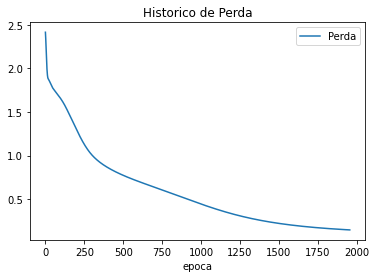

In [ ]:
import matplotlib.pyplot as plt

plt.plot(h.loss_curve_)
plt.title('Historico de Perda')
plt.xlabel('epoca')
plt.legend(['Perda'])

Pronto, você pode escrever um código simples de aprendizado de máquina em apenas 30 minutos usando Python e Google Colab.


# MLP com Scikit Learn (Parte 2)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
Model = MLPClassifier(hidden_layer_sizes=(10,5),  
                      max_iter=200, 
                      alpha=0.01, 
                      solver='sgd', verbose=1,  
                      random_state=121) 
h=Model.fit(x_train,y_train)
y_pred=Model.predict(x_test)

print(classification_report(y_test,y_pred)) # Imprimir Resumo 

print(confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))) # Imprimindo uma matriz de confusão

print('accuracia é ',accuracy_score(y_pred,y_test)) # Score de Acurácia

Iteration 1, loss = 2.41601784
Iteration 2, loss = 2.38443342
Iteration 3, loss = 2.34334799
Iteration 4, loss = 2.29650796
Iteration 5, loss = 2.24751391
Iteration 6, loss = 2.19856126
Iteration 7, loss = 2.15119599
Iteration 8, loss = 2.10619143
Iteration 9, loss = 2.06413281
Iteration 10, loss = 2.02601811
Iteration 11, loss = 1.99262887
Iteration 12, loss = 1.96449535
Iteration 13, loss = 1.94135483
Iteration 14, loss = 1.92248730
Iteration 15, loss = 1.90813048
Iteration 16, loss = 1.89766664
Iteration 17, loss = 1.89002101
Iteration 18, loss = 1.88460055
Iteration 19, loss = 1.88069976
Iteration 20, loss = 1.87750905
Iteration 21, loss = 1.87459415
Iteration 22, loss = 1.87169541
Iteration 23, loss = 1.86867100
Iteration 24, loss = 1.86546908
Iteration 25, loss = 1.86205705
Iteration 26, loss = 1.85847168
Iteration 27, loss = 1.85474001
Iteration 28, loss = 1.85085386
Iteration 29, loss = 1.84691989
Iteration 30, loss = 1.84286678
Iteration 31, loss = 1.83872063
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


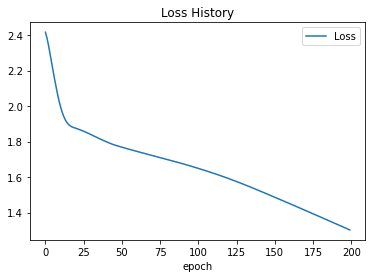

In [ ]:
import matplotlib.pyplot as plt

plt.plot(h.loss_curve_)
plt.title('Loss History')
plt.xlabel('epoch')
plt.legend(['Loss'])

class sklearn.neural_network.MLPClassifier
(hidden_layer_sizes=100,
 activation='relu', *, 
 solver='adam', alpha=0.0001, 
 batch_size='auto', learning_rate='constant', 
 learning_rate_init=0.001, 
 power_t=0.5, 
 max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)



# Parâmetros
**hidden_layer_sizes tuple, length = n_layers - 2, default=(100,)**
O i-ésimo elemento representa o número de neurônios na i-ésima camada oculta.


**activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’**
Função de ativação para a camada oculta.

*  ‘identity’, ativação sem operação, útil para implementar gargalo linear, retorna f (x) = x

*  ‘logistic’, a função sigmóide logística, retorna f (x) = 1 / (1 + exp (-x)).

*  ‘tanh’, a função tan hiperbólica, retorna f (x) = tanh (x).

*  ‘relu’, a função de unidade linear retificada, retorna f (x) = max (0, x)


**solver{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’**
O solucionador para otimização de peso.

*  ‘lbfgs’ é um otimizador na família de métodos quase Newton.

*  ‘sgd’ refere-se à descida do gradiente estocástico.

*  ‘adam’ refere-se a um otimizador baseado em gradiente estocástico proposto por Kingma, Diederik e Jimmy Ba

Nota: O solucionador padrão 'adam' funciona muito bem em conjuntos de dados relativamente grandes (com milhares de amostras de treinamento ou mais) em termos de tempo de treinamento e pontuação de validação. Para pequenos conjuntos de dados, entretanto, 'lbfgs' pode convergir mais rápido e ter um desempenho melhor.

**alphafloat, default=0.0001**
Parâmetro de penalidade L2 (termo de regularização).



**learning_rate{‘constant’, ‘invscaling’, ‘adaptive’}, default=’constant’**
Cronograma de taxas de aprendizagem para atualizações de peso.

*  ‘constant’ é uma taxa de aprendizado constante dada por 'learning_rate_init'.

*  ‘invscaling’ diminui gradualmente a taxa de aprendizagem em cada passo de tempo 't' usando um expoente de escala inversa de 'power_t'. Effective_learning_rate = learning_rate_init / pow (t, power_t)

*  ‘adaptive’ mantém a taxa de aprendizagem constante para 'learning_rate_init' enquanto a perda de treinamento continuar diminuindo. Cada vez que duas épocas consecutivas falham em diminuir a perda de treinamento em pelo menos tol, ou falham em aumentar a pontuação de validação em pelo menos tol se 'early_stopping' estiver ativada, a taxa de aprendizado atual é dividida por 5.

Usado somente quando solver='sgd'.

**learning_rate_initdouble, default=0.001**
A taxa de aprendizagem inicial usada. Ele controla o tamanho do passo na atualização dos pesos. Usado somente quando solver = 'sgd' ou 'adam'.

**power_tdouble, default=0.5**
O expoente para a taxa de aprendizado de escala inversa. É usado na atualização da taxa de aprendizagem efetiva quando o learning_rate é definido como 'invscaling'. Usado apenas quando solver = 'sgd'.

**max_iterint, default=200**
Número máximo de iterações. O solucionador itera até a convergência (determinada por 'tol') ou este número de iterações. Para solucionadores estocásticos ('sgd', 'adam'), observe que isso determina o número de épocas (quantas vezes cada ponto de dados será usado), não o número de etapas de gradiente.


**verbosebool, default=False**
Se deve imprimir mensagens de progresso para stdout.

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html